# Step 1: Import required libraries

In [1]:
import geopandas as gpd
import folium
import pandas as pd
import numpy as np
import requests as req

# Step 2: Load the US counties shapefile and filter out the Indiana counties


In [4]:
zipfile = "zip://./tl_2024_us_county.zip"
counties = gpd.read_file(zipfile)
in_counties = counties[counties.STATEFP == '18']

<Axes: >

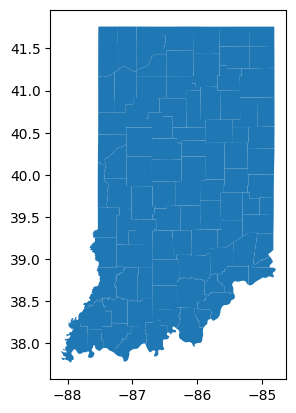

In [5]:
in_counties.plot()

# Step 3: Use Census data API to request the total population and population >65 for all counties in IN

In [6]:
url = 'https://api.census.gov/data/2020/dec/dp?get=DP1_0024C,DP1_0001C&for=county:*&in=state:18'
r = req.get(url)
raw_data = r.json()
raw_data

[['DP1_0024C', 'DP1_0001C', 'state', 'county'],
 ['5801', '35809', '18', '001'],
 ['59155', '385410', '18', '003'],
 ['13732', '82208', '18', '005'],
 ['1572', '8719', '18', '007'],
 ['2632', '12112', '18', '009'],
 ['10511', '70812', '18', '011'],
 ['3814', '15475', '18', '013'],
 ['3920', '20306', '18', '015'],
 ['7009', '37870', '18', '017'],
 ['19910', '121093', '18', '019'],
 ['5062', '26466', '18', '021'],
 ['5706', '33190', '18', '023'],
 ['2157', '10526', '18', '025'],
 ['5416', '33381', '18', '027'],
 ['9332', '50679', '18', '029'],
 ['4846', '26472', '18', '031'],
 ['7389', '43265', '18', '033'],
 ['20345', '111903', '18', '035'],
 ['8050', '43637', '18', '037'],
 ['31366', '207047', '18', '039'],
 ['4990', '23398', '18', '041'],
 ['14092', '80484', '18', '043'],
 ['3432', '16479', '18', '045'],
 ['4344', '22785', '18', '047'],
 ['4119', '20480', '18', '049'],
 ['6058', '33011', '18', '051'],
 ['13286', '66674', '18', '053'],
 ['6239', '30803', '18', '055'],
 ['46440', '34746

# Step 4: Convert to a dataframe and set the data type to enable plotting on a map


In [7]:
data = np.array(raw_data[1:])
census_data = pd.DataFrame.from_records(data,columns=['pop65','totpop','state','county'])
census_data = census_data.astype({'pop65':'int32','totpop':'int32','county':'str'})
census_data

pop65  totpop state county
0    5801   35809    18    001
1   59155  385410    18    003
2   13732   82208    18    005
3    1572    8719    18    007
4    2632   12112    18    009
..    ...     ...   ...    ...
87   4975   28182    18    175
88  13266   66553    18    177
89   5437   28180    18    179
90   5110   24688    18    181
91   6341   34191    18    183

[92 rows x 4 columns]

# Step 5: Calculate the percentage of pop > 65 to total population


In [8]:
census_data['percent'] = census_data['pop65']/census_data['totpop']*100
census_data.dtypes

pop65        int32
totpop       int32
state       object
county      object
percent    float64
dtype: object

# Step 6: cast the COUNTYFP feature to string to enable keying on that feature


In [9]:
in_counties = in_counties.astype({'COUNTYFP': 'str'})
in_counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

# Plot a choropleth map of population > 65 years; provide custom set of bins


In [10]:
m = folium.Map(location=[40, -85], zoom_start=7, tiles="CartoDB positron")
folium.Choropleth(
    geo_data=in_counties,
    data=census_data,
    columns=["county", "pop65"],
    key_on="feature.properties.COUNTYFP",
    fill_opacity=0.3,
    line_weight=2,
    bins=[1000,2000,5000,10000,50000,100000,150000],
    fill_color="YlGn",
).add_to(m)
m

# Plot the percentage value


In [11]:
m = folium.Map(location=[40, -85], zoom_start=7, tiles="CartoDB positron")
folium.Choropleth(
    geo_data=in_counties,
    data=census_data,
    columns=["county", "percent"],
    key_on="feature.properties.COUNTYFP",
    fill_opacity=0.3,
    line_weight=2,
    fill_color="YlGn",
).add_to(m)
m